# Series de tiempo ERA5

## Importamos librerías necesarias

In [42]:
import pandas as pd
import numpy as np
import glob

## Datos geográficos de nuestra estación climática

In [43]:
## Lon, Lat, Elevacion

EMA15 = [-77.688333, -9.222450, 2118]

In [44]:
ERA5_EMA15 = pd.read_csv('../data/ERA5_EMA15.csv', delimiter='\t', index_col=['Datetime'], 
                 parse_dates=['Datetime'])
ERA5_EMA15

,longitude,latitude,t2m,z,tp
Datetime,,,,,
2013-12-31 19:00:00,-77.75,-9.25,280.64580,37063.72,1.158565e-05
2014-01-01 01:00:00,-77.75,-9.25,277.90180,37063.72,0.000000e+00
2014-01-01 07:00:00,-77.75,-9.25,279.36935,37063.72,0.000000e+00
2014-01-01 13:00:00,-77.75,-9.25,285.01968,37063.72,7.392447e-04
2014-01-01 19:00:00,-77.75,-9.25,279.97020,37063.72,1.873057e-04
...,...,...,...,...,...
2018-12-30 13:00:00,-77.75,-9.25,287.09253,37063.72,3.051260e-04
2018-12-30 19:00:00,-77.75,-9.25,281.84280,37063.72,4.348811e-05
2018-12-31 01:00:00,-77.75,-9.25,278.87656,37063.72,4.726462e-07


## Vamos aplicar un downscaling estadístico

In [45]:
g       = 9.80665
hgt_era = (ERA5_EMA15['z'].values[0]/g)
hgt_aws = EMA15[2]
print(hgt_era)
print(hgt_aws)
print(hgt_aws-hgt_era)

3779.4476197274303
2118
-1661.4476197274303


In [46]:
ERA5_EMA15['t2m_corr'] = ERA5_EMA15['t2m'].values + (hgt_aws - hgt_era) * (-0.50/100)
ERA5_EMA15[['t2m', 't2m_corr']] = ERA5_EMA15[['t2m', 't2m_corr']] - 273.16
ERA5_EMA15

,longitude,latitude,t2m,z,tp,t2m_corr
Datetime,,,,,,
2013-12-31 19:00:00,-77.75,-9.25,7.48580,37063.72,1.158565e-05,15.793038
2014-01-01 01:00:00,-77.75,-9.25,4.74180,37063.72,0.000000e+00,13.049038
2014-01-01 07:00:00,-77.75,-9.25,6.20935,37063.72,0.000000e+00,14.516588
2014-01-01 13:00:00,-77.75,-9.25,11.85968,37063.72,7.392447e-04,20.166918
2014-01-01 19:00:00,-77.75,-9.25,6.81020,37063.72,1.873057e-04,15.117438
...,...,...,...,...,...,...
2018-12-30 13:00:00,-77.75,-9.25,13.93253,37063.72,3.051260e-04,22.239768
2018-12-30 19:00:00,-77.75,-9.25,8.68280,37063.72,4.348811e-05,16.990038
2018-12-31 01:00:00,-77.75,-9.25,5.71656,37063.72,4.726462e-07,14.023798


### Vamos usar **`1D`** para promediar diariamente

<AxesSubplot:xlabel='Datetime'>

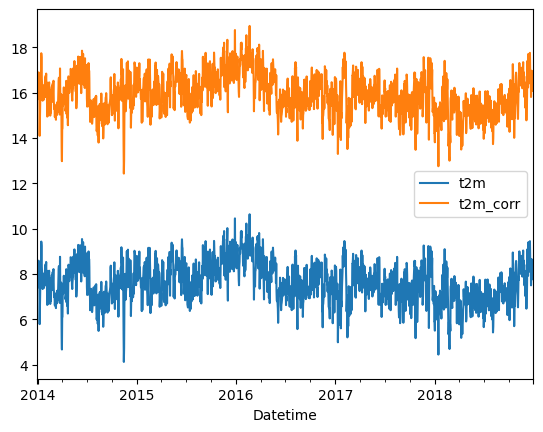

In [47]:
ERA5_EMA15[['t2m', 't2m_corr']].resample('1D').mean().plot()

In [48]:
ERA5_EMA15_T2 = ERA5_EMA15[['t2m', 't2m_corr']].resample('1D').mean()
ERA5_EMA15_T2

,t2m,t2m_corr
Datetime,,
2013-12-31,7.485800,15.793038
2014-01-01,7.405257,15.712496
2014-01-02,8.272267,16.579506
2014-01-03,8.158335,16.465573
2014-01-04,8.591067,16.898306
...,...,...
2018-12-27,8.545135,16.852373
2018-12-28,8.618187,16.925426
2018-12-29,8.523847,16.831086


## Leemos nuestros datos observados

In [49]:
OBS_EMA15 = pd.read_csv('../data/EMA15_Tingua.dat', delimiter='\t', index_col=['Fecha'], 
                 parse_dates=['Fecha'])

In [50]:
OBS_EMA15

,Temp,RH2,Precip,QSWin
Fecha,,,,
2014-01-01 01:00:00,12.4,NaN,0.0,NaN
2014-01-01 02:00:00,11.6,NaN,0.0,NaN
2014-01-01 03:00:00,11.1,NaN,0.0,NaN
2014-01-01 04:00:00,10.5,NaN,0.0,NaN
2014-01-01 05:00:00,10.5,NaN,0.0,NaN
...,...,...,...,...
2018-12-12 20:00:00,NaN,NaN,NaN,NaN
2018-12-12 21:00:00,NaN,NaN,NaN,NaN
2018-12-12 22:00:00,NaN,NaN,NaN,NaN


In [51]:
OBS_EMA15.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34608 entries, 2014-01-01 01:00:00 to 2018-12-13 00:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    34423 non-null  float64
 1   RH2     16130 non-null  float64
 2   Precip  32562 non-null  float64
 3   QSWin   16130 non-null  float64
dtypes: float64(4)
memory usage: 1.3 MB


In [52]:
OBS_EMA15_T2 = OBS_EMA15[['Temp']].resample('1D').mean()
OBS_EMA15_T2

,Temp
Fecha,
2014-01-01,16.491304
2014-01-02,16.066667
2014-01-03,14.395000
2014-01-04,15.905833
2014-01-05,17.001250
...,...
2018-12-09,15.893333
2018-12-10,15.413750
2018-12-11,18.188750


## Ahora vamos juntar los **`dataframes`**

In [53]:
T2_all = pd.merge(ERA5_EMA15_T2, OBS_EMA15_T2, how='left', left_index=True, right_index=True)
T2_all

,t2m,t2m_corr,Temp
Datetime,,,
2013-12-31,7.485800,15.793038,NaN
2014-01-01,7.405257,15.712496,16.491304
2014-01-02,8.272267,16.579506,16.066667
2014-01-03,8.158335,16.465573,14.395000
2014-01-04,8.591067,16.898306,15.905833
...,...,...,...
2018-12-27,8.545135,16.852373,NaN
2018-12-28,8.618187,16.925426,NaN
2018-12-29,8.523847,16.831086,NaN


Tenga en cuenta que se está servado la serie temporal del **ERA5** por ser más completa!!

## Cambiando los nombres de las columnas

In [54]:
T2_all.columns = ['ERA5', 'ERA5_corr', 'OBS']
T2_all

,ERA5,ERA5_corr,OBS
Datetime,,,
2013-12-31,7.485800,15.793038,NaN
2014-01-01,7.405257,15.712496,16.491304
2014-01-02,8.272267,16.579506,16.066667
2014-01-03,8.158335,16.465573,14.395000
2014-01-04,8.591067,16.898306,15.905833
...,...,...,...
2018-12-27,8.545135,16.852373,NaN
2018-12-28,8.618187,16.925426,NaN
2018-12-29,8.523847,16.831086,NaN


<AxesSubplot:xlabel='Datetime'>

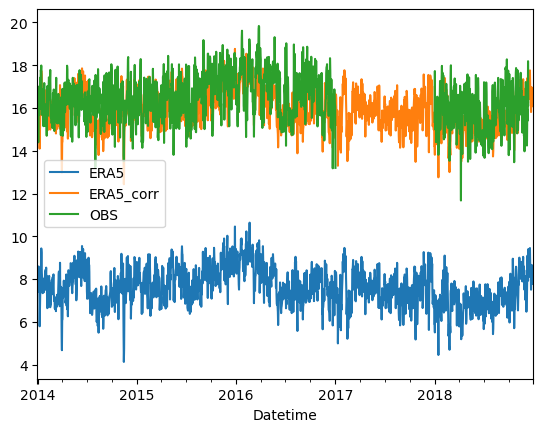

In [55]:
T2_all.plot()

## Correlación de los datos

Vamos a crear un dataframe que contenga solo los datos de temperatura observada y ERA5. Además vamos a eliminar los valores faltantes.

In [56]:
temp2 = T2_all[['ERA5_corr', 'OBS']].dropna()
temp2.columns = ['MOD', 'OBS']
temp2

,MOD,OBS
Datetime,,
2014-01-01,15.712496,16.491304
2014-01-02,16.579506,16.066667
2014-01-03,16.465573,14.395000
2014-01-04,16.898306,15.905833
2014-01-05,16.471853,17.001250
...,...,...
2018-12-08,16.325138,15.416667
2018-12-09,17.406026,15.893333
2018-12-10,16.584528,15.413750


## Importamos funciones disponibles de **`sklearn`** y **`scipy`**

In [57]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy.stats import gaussian_kde

Declaramos dos variables para facilitar más adelante.

In [58]:
y1 = temp2['OBS'].values
y2 = temp2['MOD'].values

Creamos una variable que contenga la información del index y hacemos que sea aleatorio. Además vamos a generar una variable que con potencia 10 para usar en la figura de dispersión.

In [59]:
idxs = np.arange(len(y1))
np.random.shuffle(idxs)
n_toplot=10**10

Vamos hacer un redimensionado de nuestros vectores de temperatura observada y ERA 

In [60]:
y_expected = y1.reshape(-1)[idxs[:n_toplot]]
y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

Creamos una nueva matriz que contenga los datos redimensionados.

In [61]:
xy = np.vstack([y_expected, y_predicted])
print(xy)

[[18.29875    16.32916667 16.87083333 ... 17.88875    16.0525
  14.76      ]
 [16.8851631  15.5350256  14.9020931  ... 15.6938781  15.7284706
  15.8193831 ]]


Ahora usamos la función **`gaussian_kde`** para estimar la densidad de nuestros datos.

In [62]:
z = gaussian_kde(xy)(xy)

Ordenamos los puntos por densidad, de modo que los puntos más densos se tracen en último lugar

In [63]:
idx = z.argsort()
y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]

### Generar nuestra figura de densidad de dispersión en función de su densidad

In [64]:
import matplotlib.pyplot as plt

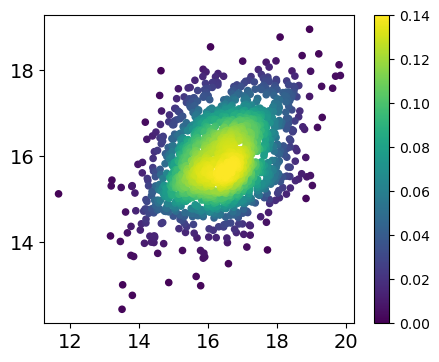

In [65]:
fig = plt.figure(figsize=(5,4))
sc = plt.scatter(y_plt, ann_plt, c=z, s=20)

# Agregamos colorbar y ajustamos de 0 a 0.14
plt.colorbar(sc)
plt.clim(0,0.14)
plt.tick_params(labelsize=14)


Miremos cómo va quedando nuestra figura!!

### Mejoramos nuestra figura

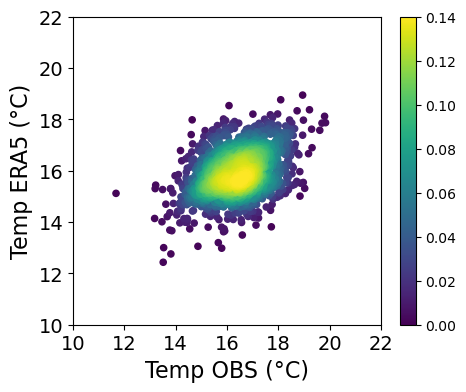

In [66]:
fig = plt.figure(figsize=(5,4))
sc = plt.scatter(y_plt, ann_plt, c=z, s=20)

# Agregamos colorbar y ajustamos de 0 a 0.14
plt.colorbar(sc)
plt.clim(0,0.14)
plt.tick_params(labelsize=14)

# Agregamos las etiquetas a los ejes y damos ajustes
plt.ylabel('Temp ERA5 (°C)', fontsize=16)
plt.xlabel('Temp OBS (°C)', fontsize=16)

# Podemos colocar las etiquetas deseada
plt.gca().set_box_aspect(1)
plt.xticks(np.arange(10,30,2))
plt.yticks(np.arange(10,30,2))
plt.xlim(10, 22)
plt.ylim(10, 22)

print('')

### Agregamos la línea de regresión y algunos indicadores estadísticos

Creamos nuestro modelo lineal y un vector que va desde 5°C hasta 29°C.

In [67]:
reg = LinearRegression().fit(y1.reshape(-1, 1),y2)
print(reg)
x_int = np.arange(5,29,0.1)
print(x_int)

LinearRegression()
[ 5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3
  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7
  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1
  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5
 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9
 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3
 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7
 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16.  16.1
 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9 17.  17.1 17.2 17.3 17.4 17.5
 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9
 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7 19.8 19.9 20.  20.1 20.2 20.3
 20.4 20.5 20.6 20.7 20.8 20.9 21.  21.1 21.2 21.3 21.4 21.5 21.6 21.7
 21.8 21.9 22.  22.1 22.2 22.3 22.4 22.5 22.6 22.7 22.8 22.9 23.  23.1
 23.2 23.3 23.4 23.5 23.6 23.7 23.8 23.9 24.  24.1 24.2 24

Calculamos coeficiente de determinación, bias y RMSE. Los guardamos en un string.

In [68]:
from scipy import stats
import math

In [69]:
def sts_ind_SMB_dec(ds1):
    ds1 = ds1.dropna()
    ds1.columns = ['OBS', 'SIM']
    r  = stats.pearsonr(ds1['OBS'], ds1['SIM'])[0]
    MBE = np.mean(ds1['SIM'] - ds1['OBS']) 
    MSE  = np.square(np.subtract(ds1['OBS'], ds1['SIM'])).mean() 
    RMSE = math.sqrt(MSE)

    textstr = '\n'.join((
    r'$r=%.2f$' % (r, ),
    r'$Bias=%.2f$' % (MBE, ),
    r'$RMSE=%.2f$' % (RMSE, )))

    return textstr



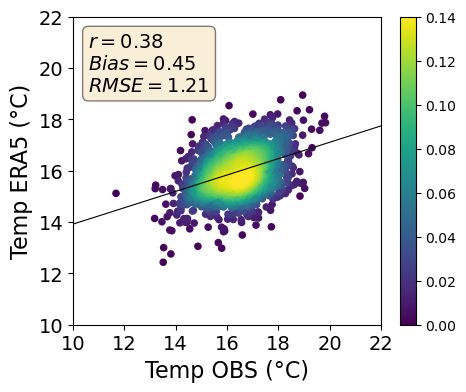

In [70]:
fig = plt.figure(figsize=(5,4))
sc = plt.scatter(y_plt, ann_plt, c=z, s=20)

# Agregamos colorbar y ajustamos de 0 a 0.14
plt.colorbar(sc)
plt.clim(0,0.14)
plt.tick_params(labelsize=14)

# Agregamos las etiquetas a los ejes y damos ajustes
plt.ylabel('Temp ERA5 (°C)', fontsize=16)
plt.xlabel('Temp OBS (°C)', fontsize=16)

# Podemos colocar las etiquetas deseada
plt.gca().set_box_aspect(1)
plt.xticks(np.arange(10,30,2))
plt.yticks(np.arange(10,30,2))

plt.xlim(10, 22)
plt.ylim(10, 22)

# Agregamos la regresión lineal
plt.plot(x_int, reg.intercept_ + reg.coef_ * x_int, linewidth=0.8, color='k', linestyle ='-')

# Vamos agregar un caja para que se muestre los indicadores estadísticos. Aquí configuramos los propiedades de la caja
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Ahora podemos agregar nuestros indicadores estadísticos
plt.text(0.05, 0.95, sts_ind_SMB_dec(temp2), transform=plt.gca().transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

# Finalmente guardamos nuestra figura
fig.savefig('fig/Temp_corr_1963_2020.png', dpi = 200, facecolor='w', bbox_inches = 'tight', 
            pad_inches = 0.1)